## blinkit customer segment

## step 1. libarys importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns

In [3]:
import pandas as pd

# Load the dataset
customers = pd.read_csv('Customer.csv')
orders = pd.read_csv('Orders.csv')
order_details = pd.read_csv('OrderDetails.csv')

# Check the first few rows
print(customers.head())
print(orders.head())
print(order_details.head())


   CustomerID             Name       Phone                 Address       City
0           1      Kavya Reddy  9193214172      Koramangala, Delhi     Mumbai
1           2  Siddharth Joshi  1628503012     Civil Lines, Jaipur       Pune
2           3       Neha Joshi  6430427670  Civil Lines, Hyderabad     Jaipur
3           4  Siddharth Mehta  2645852001         MG Road, Jaipur     Jaipur
4           5     Rajesh Reddy  2428071930       Koramangala, Pune  Ahmedabad
   OrderID  CustomerID     OrderDateTime  DeliveryDateTime  TotalAmount  \
0        1          17  17-11-2024 22:12  17-11-2024 22:27          113   
1        2          71  13-11-2024 10:52  13-11-2024 11:03         1170   
2        3           2  25-10-2024 03:06  25-10-2024 03:17          837   
3        4         155  13-10-2024 20:52  13-10-2024 21:05          357   
4        5         270  22-10-2024 05:01  22-10-2024 05:12          410   

  DeliveryStatus  
0      Delivered  
1      Delivered  
2      Delivered  
3    

## 2. Data Cleaning

## a) Check for Missing Values:



In [4]:
# Check for missing values in each table
print(customers.isnull().sum())
print(orders.isnull().sum())
print(order_details.isnull().sum())


CustomerID    0
Name          0
Phone         0
Address       0
City          0
dtype: int64
OrderID              0
CustomerID           0
OrderDateTime        0
DeliveryDateTime    76
TotalAmount          0
DeliveryStatus       0
dtype: int64
OrderDetailsID    0
OrderID           0
ProductName       0
Quantity          0
PricePerUnit      0
dtype: int64


## b) Check for Duplicates:

In [5]:
# Check for duplicates
print(customers.duplicated().sum())
print(orders.duplicated().sum())
print(order_details.duplicated().sum())

# Remove duplicates
customers = customers.drop_duplicates()
orders = orders.drop_duplicates()
order_details = order_details.drop_duplicates()


0
0
0


## 3. Data Exploration

## a) Summary Statistics:



In [6]:
# Summary statistics
print(customers.describe())
print(orders.describe())
print(order_details.describe())


       CustomerID         Phone
count  300.000000  3.000000e+02
mean   150.500000  5.071988e+09
std     86.746758  2.924401e+09
min      1.000000  3.459278e+07
25%     75.750000  2.413212e+09
50%    150.500000  5.171566e+09
75%    225.250000  7.598009e+09
max    300.000000  9.995983e+09
           OrderID   CustomerID  TotalAmount
count  4000.000000  4000.000000  4000.000000
mean   2000.500000   149.849500   805.122000
std    1154.844867    87.733156   406.873926
min       1.000000     1.000000   100.000000
25%    1000.750000    74.000000   452.000000
50%    2000.500000   147.000000   813.000000
75%    3000.250000   228.000000  1160.000000
max    4000.000000   300.000000  1500.000000
       OrderDetailsID       OrderID      Quantity  PricePerUnit
count     10000.00000  10000.000000  10000.000000  10000.000000
mean       5000.50000   1996.715200      3.011500     89.953500
std        2886.89568   1152.513925      1.406686     70.970648
min           1.00000      1.000000      1.000000  

## b) Distribution of Orders by City:


In [7]:
 # Group by city and count orders
city_orders = orders.merge(customers, on='CustomerID').groupby('City')['OrderID'].count()

# Sort and display top cities
print(city_orders.sort_values(ascending=False).head(10))


City
Jaipur       658
Hyderabad    631
Mumbai       626
Ahmedabad    598
Pune         511
Delhi        501
Bangalore    475
Name: OrderID, dtype: int64


# above distribution shows the orders per city:
* jaipur has (658) highest orders compare other citys.
* Hyderabad has (631)  second highest orders from among all of them.
* Mumbai has (626) third highest orders from among all of them.

## c) Most Profitable Product:


In [7]:
# Calculate profit
order_details['Profit'] = order_details['Quantity'] * order_details['PricePerUnit'] * 0.2

# Group by product and calculate total profit
product_profit = order_details.groupby('ProductName')['Profit'].sum()

# Display most profitable products
print(product_profit.sort_values(ascending=False).head(10))


ProductName
Harpic Toilet Cleaner    31398.6
Dove Soap                30547.0
Himalaya Face Wash       28849.8
Parle-G Biscuits         28056.6
Tata Tea Gold            27932.6
Good Day Cookies         27679.4
Amul Butter              27606.2
Red Label Tea            27352.2
Nestle Milk              27294.4
Aashirvaad Atta          26451.0
Name: Profit, dtype: float64


## above details show about the highest profit products
* harpic toilet cleaner has highest number of product profit.
* Dove soap has second highest number of product profit.
* himalaya face wash has third highest profit product.

## 4. Data Visualization

## a) Bar Chart: City-wise Orders

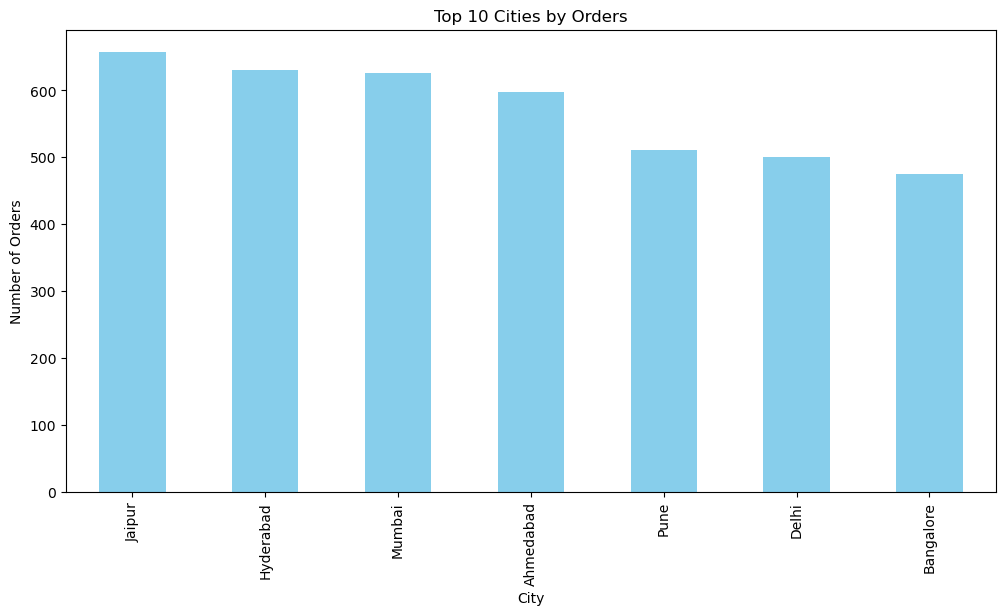

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot city-wise orders
plt.figure(figsize=(12, 6))
city_orders.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Orders')
plt.ylabel('Number of Orders')
plt.xlabel('City')
plt.show()


# above distribution shows the orders per city:
* jaipur has (658) highest orders compare other citys.
* Hyderabad has (631)  second highest orders from among all of them.
* Mumbai has (626) third highest orders from among all of them.

## b) Bar Chart: Most Profitable Products


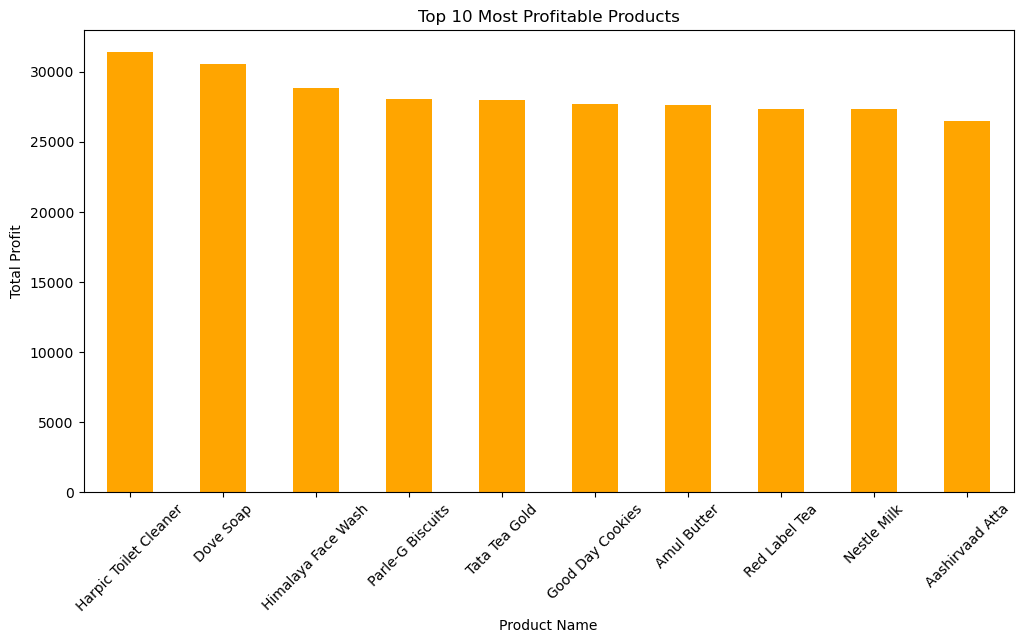

In [9]:
# Plot top 10 profitable products
plt.figure(figsize=(12, 6))
product_profit.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Profitable Products')
plt.ylabel('Total Profit')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()


## above details show about the highest profit products
* harpic toilet cleaner has highest number of product profit.
* Dove soap has second highest number of product profit.
* himalaya face wash has third highest profit product.

## c) Distribution of Total Order Amount:

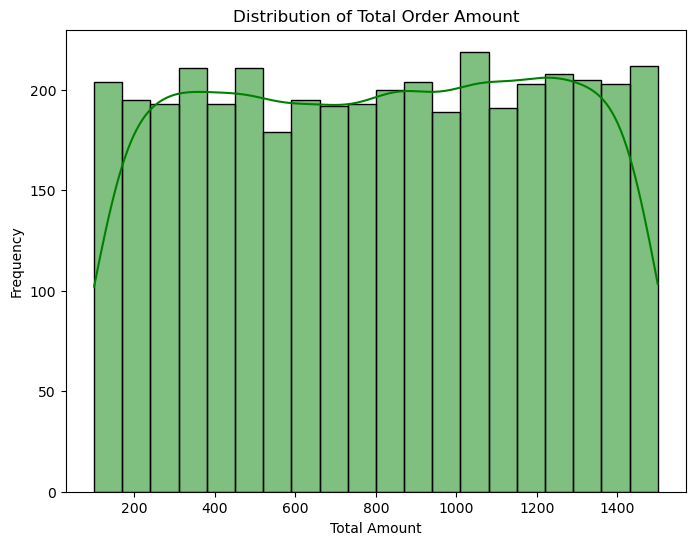

In [10]:
# Histogram for total order amount
plt.figure(figsize=(8, 6))
sns.histplot(orders['TotalAmount'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Order Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()


## Insights:
* The histogram bars depict the frequency of orders within specific total amount ranges.
* The KDE curve smoothens the data, providing an estimated probability density function.
* The distribution appears relatively uniform with no sharp peaks, suggesting consistent order sizes across the dataset.
* Slight drops are visible at the lower and higher ends of the total amount range, indicating fewer very low or very high-value orders.
## Usage: This visualization helps businesses understand customer spending patterns and identify anomalies or common order value ranges

## d) Monthly Sales Trend:

C:\Users\HP\AppData\Local\Temp\ipykernel_14816\3245025134.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders['OrderMonth'] = pd.to_datetime(orders['OrderDateTime']).dt.to_period('M')


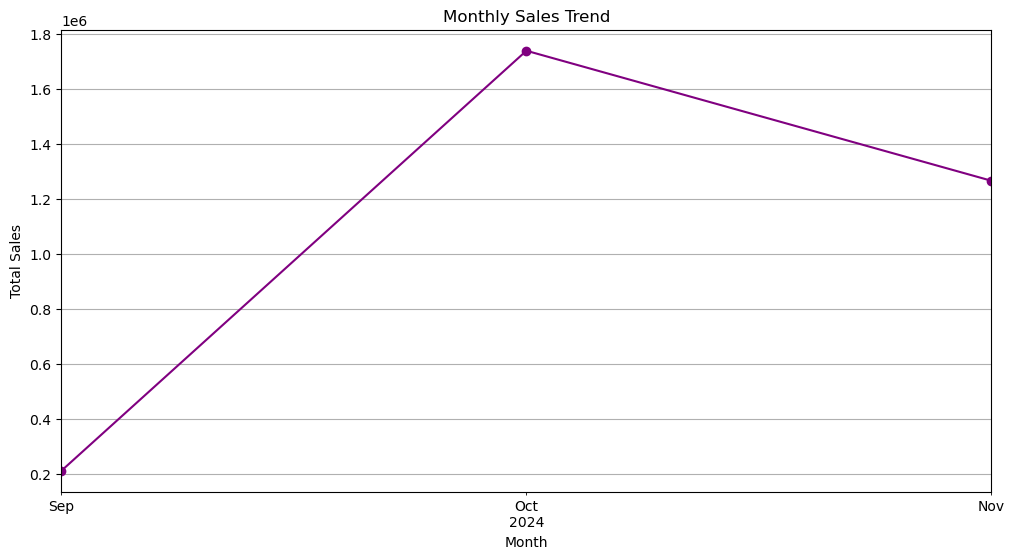

In [11]:
# Convert OrderDateTime to datetime and extract month
orders['OrderMonth'] = pd.to_datetime(orders['OrderDateTime']).dt.to_period('M')

# Group by month and sum total amounts
monthly_sales = orders.groupby('OrderMonth')['TotalAmount'].sum()

# Plot sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.show()


## insights:
* Sales Growth: Sales saw a significant increase from September to October, with a sharp rise in total sales, suggesting a possible seasonal impact or a successful campaign.
* Sales Decline: There was a noticeable drop in sales from October to November, indicating either the end of a peak season, reduced promotions, or other factors affecting sales.
* Magnitude of Sales: The highest sales occurred in October, with over 1.8 million units, compared to September (around 200k) and November (approximately 1.2 million).
# Usage: This visualization is useful for businesses to track monthly performance, identify peak sales periods, and strategize for future growth by understanding factors driving these trends.

## 5. Correlation Analysis

##  Correlation Between Quantity and Profit:

          Quantity    Profit
Quantity  1.000000  0.473872
Profit    0.473872  1.000000


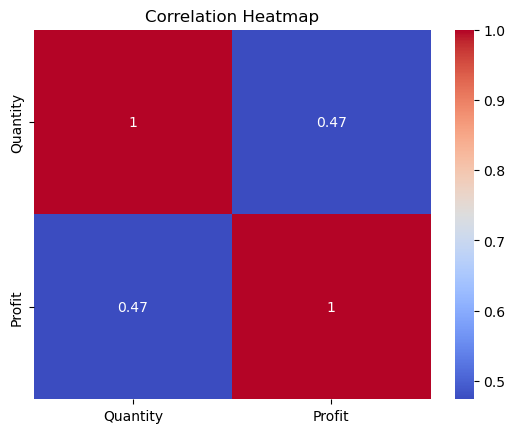

In [12]:
# Correlation between Quantity and Profit
correlation = order_details[['Quantity', 'Profit']].corr()
print(correlation)

# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Insights:

Quantity and Profit Relationship:
A correlation of 0.47 suggests that as the quantity sold increases, the profit tends to increase, but the relationship is not very strong. 
There might be other factors influencing profit beyond just the quantity sold.
The lack of a strong correlation may imply that higher quantities do not always guarantee proportional profit gains, possibly due to factors like discounts on bulk sales, cost variations, or product pricing strategies.

## Color Coding:

* The red shades indicate stronger positive correlations (closer to 1).
* The blue shades indicate weaker positive correlations (closer to 0.5 or lower).
* The clear distinction in colors helps identify the strength of relationships at a glance.
## Applications:

This analysis can guide business strategies, such as identifying how much focus should be placed on increasing quantity to improve profitability.
Further analysis might be needed to understand other variables that significantly impact profit.


## Customer Segmentation (RFM Analysis)


C:\Users\HP\AppData\Local\Temp\ipykernel_27700\56279917.py:12: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders_df["OrderDateTime"] = pd.to_datetime(orders_df["OrderDateTime"])
C:\Users\HP\anaconda3\arshad\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


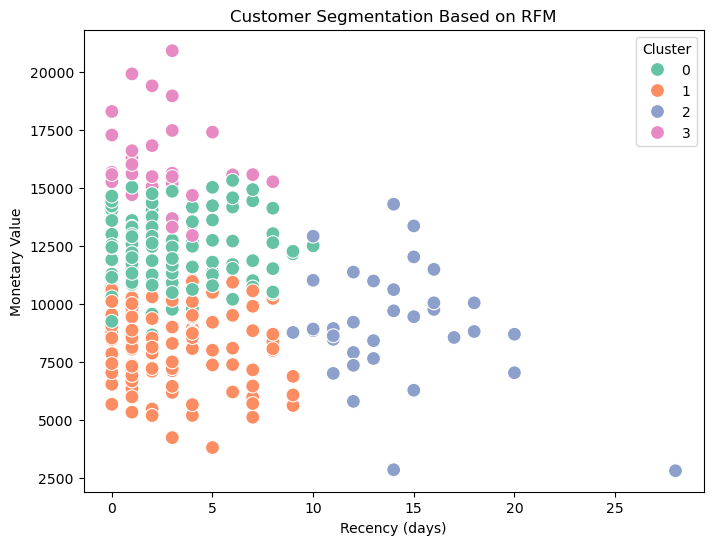

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
customers_df = pd.read_csv("Customer.csv")
orders_df = pd.read_csv("Orders.csv")

# Prepare RFM Metrics
orders_df["OrderDateTime"] = pd.to_datetime(orders_df["OrderDateTime"])
latest_date = orders_df["OrderDateTime"].max()
rfm = orders_df.groupby("CustomerID").agg({
    "OrderDateTime": lambda x: (latest_date - x.max()).days,  # Recency
    "OrderID": "count",                                      # Frequency
    "TotalAmount": "sum"                                     # Monetary
}).reset_index()
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Standardize RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Visualize Segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster", palette="Set2", s=100)
plt.title("Customer Segmentation Based on RFM")
plt.xlabel("Recency (days)")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster")
plt.show()


## Summary of the Visualization
The provided visualization depicts customer segmentation based on RFM analysis (Recency, Frequency, Monetary value) using a scatter plot. The data points are clustered into four groups, represented by different colors, based on customer behavior. Here’s a detailed summary:

 ## Axes:

X-axis (Recency): Represents the number of days since the customer's last purchase.
Y-axis (Monetary Value): Indicates the total monetary value of transactions for each customer.
## Clusters:

The scatter plot is color-coded to represent four distinct customer clusters:
* Cluster 0 (Green): Represents customers with moderate recency and high monetary value.
* Cluster 1 (Orange): Indicates customers with low recency but lower monetary value.
* Cluster 2 (Blue): Captures customers with high recency and low monetary value.
* Cluster 3 (Pink): Highlights customers with very low recency and very high monetary value.
## Key Insights:

* Cluster 3 (Pink): Likely contains the most valuable customers who are very recent purchasers and contribute significantly to revenue.
* Cluster 2 (Blue): Represents inactive customers who haven't purchased recently and spend less.
* Cluster 0 (Green) & Cluster 1 (Orange): Show varying levels of engagement and spending, indicating opportunities for targeted marketing.
## Business Implications:

* Retention Efforts: Focus on retaining Cluster 3 (high-value customers) through loyalty programs or exclusive offers.
* Reactivation Campaigns: Design strategies to re-engage customers in Cluster 2 who have low recency and monetary value.
* Upselling or Cross-selling: Target Cluster 0 and Cluster 1 customers with moderate spending and engagement.
* Overall Observation: This segmentation provides a clear way to differentiate customers based on their purchase behavior, helping businesses implement tailored marketing strategies to maximize revenue and customer satisfaction.

## Profit Analysis

In [7]:
# Merge order details for profit analysis
order_details_df = pd.read_csv("OrderDetails.csv")
customers_df = pd.read_csv("Customer.csv")
merged_data = pd.merge(orders_df, order_details_df, on="OrderID", how="left")

# Calculate profit (20% margin assumed)
merged_data["Profit"] = (merged_data["PricePerUnit"] * merged_data["Quantity"]) * 0.2

# Profit by City
profit_by_city = merged_data.groupby('City')['Profit'].sum().reset_index().sort_values(by="Profit", ascending=False)

# Visualize Profit by City
plt.figure(figsize=(10, 6))
sns.barplot(data=profit_by_city, x="City", y="Profit", palette="viridis")
plt.title("Total Profit by City")
plt.xlabel("City")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()


KeyError: 'City'

## Sales Trends Analysis

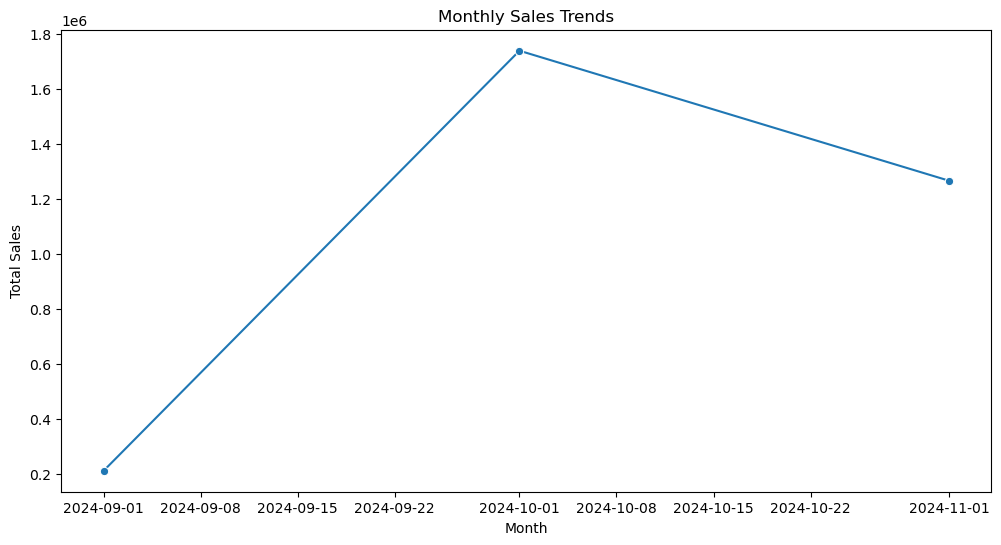

In [8]:
# Aggregate monthly sales
orders_df["OrderMonth"] = orders_df["OrderDateTime"].dt.to_period("M")
monthly_sales = orders_df.groupby("OrderMonth")["TotalAmount"].sum().reset_index()
monthly_sales["OrderMonth"] = monthly_sales["OrderMonth"].dt.to_timestamp()

# Plot Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="OrderMonth", y="TotalAmount", marker="o")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


## Key Observations:
Sales Trend:

* September 2024: Sales started at approximately 200,000 (0.2 million).
* October 2024: There was a significant increase in sales, reaching a peak of nearly 1.8 million.
* November 2024: Sales declined sharply, falling to around 1.4 million.
## Insights:

* The substantial growth from September to October may indicate a seasonal factor, promotional campaigns, or increased customer demand.
* The drop from October to November suggests either the end of a sales promotion, seasonal slowdown, or other external factors impacting sales performance.
## Overall Pattern:

The trend shows a rapid increase followed by a decline, which could signify a peak period in sales activity during October.
## Recommendations:

* Investigate the reasons behind the October spike, such as marketing campaigns or product launches, to replicate this success in future months.
* Analyze the factors causing the November decline and implement strategies to mitigate the sales drop (e.g., targeted campaigns or discounts).
* Explore customer data to identify purchasing patterns and tailor marketing efforts to maintain consistent sales.


## Forecasting Sales Trends

C:\Users\HP\anaconda3\arshad\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_27700\3347029245.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_sales["OrderMonth"].max(), periods=forecast_period + 1, freq="M")[1:]


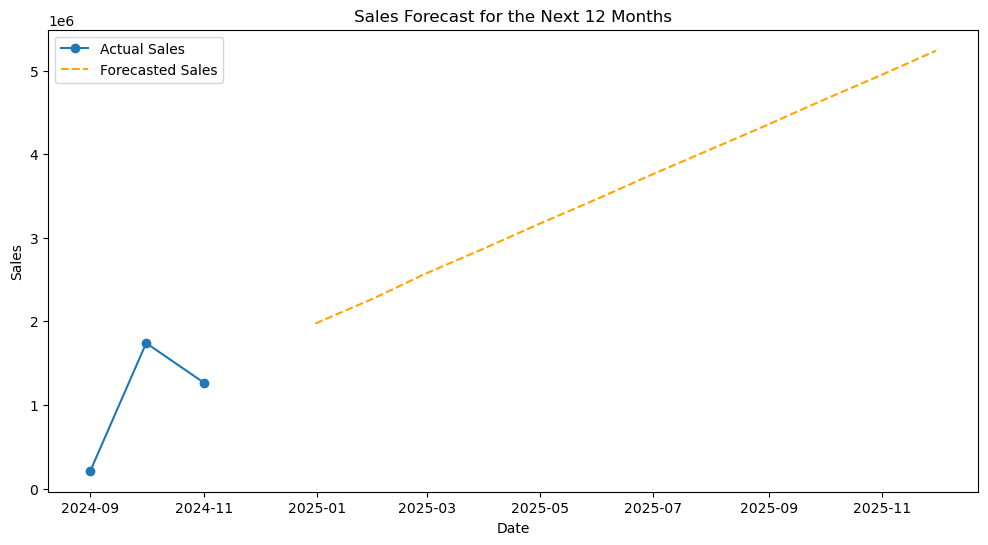

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing

# Fit Exponential Smoothing Model
sales_model = ExponentialSmoothing(monthly_sales["TotalAmount"], trend="add")
sales_forecast = sales_model.fit()

# Forecast for next 12 months
forecast_period = 12
future_dates = pd.date_range(start=monthly_sales["OrderMonth"].max(), periods=forecast_period + 1, freq="M")[1:]
forecast_values = sales_forecast.forecast(forecast_period)

# Plot Actual Sales vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["OrderMonth"], monthly_sales["TotalAmount"], label="Actual Sales", marker="o")
plt.plot(future_dates, forecast_values, label="Forecasted Sales", linestyle="--", color="orange")
plt.title("Sales Forecast for the Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


## Actual Sales:

* Represented by the solid blue line with markers.
* Data is available for a few months from September 2024 to November 2024, showing an initial increase followed by a slight decline.
## Forecasted Sales:

* Represented by the dashed orange line.
* Extends over the next 12 months, from December 2024 to November 2025.
* Indicates a consistent upward trend, projecting significant growth in sales, reaching approximately 5 million units/dollars by the end of the period.
## Key Insights:

* Sales in the observed period have fluctuated slightly but stayed below 2 million.
* Forecast suggests steady and strong growth in the upcoming months.

## Summary: BlinkID Customer Segmentation Python Project
This project focuses on analyzing customer and sales data for BlinkID, providing insights into customer behavior, sales trends, and profitability. The analysis is structured into distinct steps, including data cleaning, exploration, visualization, and forecasting.

## Key Highlights:
* Data Cleaning:

Checked for missing values and duplicates to ensure data quality.
* Data Exploration:

Summary statistics provided an overview of key metrics.
* City-wise order distribution and identification of the most profitable products were analyzed.
* Data Visualization:

Visual tools like bar charts, histograms, and trend plots highlighted:
* City-wise orders.
Most profitable products.
Monthly sales trends.
* Correlation Analysis:

Investigated the relationship between sales metrics, such as quantity and profit.
* Customer Segmentation (RFM Analysis):

Classified customers based on recency, frequency, and monetary value for targeted strategies.
* Profit Analysis:

Merged datasets to evaluate profit margins and identify growth opportunities.
* Sales Trends and Forecasting:

Monthly sales trends were analyzed.
* Future sales were forecasted using Exponential Smoothing, predicting significant growth.
## Conclusion:
The project offers actionable insights into customer segmentation and sales forecasting, supported by data cleaning, analysis, and visualization techniques. It provides a robust framework for understanding customer behavior and optimizing business strategies.